<a href="https://colab.research.google.com/github/Thien24112001/BaiTapAI_Tuan15_19146395/blob/main/NhanDangTien_VoHoangThien_19146395.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import load_img
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import cv2
from os import listdir
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [24]:
def create_img_dataset(raw_folder,dataset_name):

    target_size = (128, 128)
    pictures = []
    labels = []

    for folder in listdir(raw_folder):
      print("Folder=",folder)
      for file in listdir(raw_folder + "/" + folder):
        print("File=", file)
        pictures.append(cv2.resize(cv2.imread(raw_folder + "/" + folder + "/" + file)
                                              ,dsize = target_size))
        labels.append(folder)

    pictures = np.array(pictures)
    labels = np.array(labels)

    encoder = LabelBinarizer()
    labels = encoder.fit_transform(labels)

    with open (dataset_name, mode = 'wb') as file:
    # dump information to that file
      pickle.dump((pictures,labels), file)

    file.close()

def load_data(dataset_path):

    file = open(dataset_path, mode = 'rb')
    # dump information to that file
    (pictures, labels) = pickle.load (file)
    file.close()

    return pictures, labels

raw_folder = "/content/drive/MyDrive/money"

create_img_dataset(raw_folder= raw_folder,dataset_name= 'money.txt')
dataset_path = "money.txt"
x_data,y_data = load_data(dataset_path= 'money.txt')

x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.2, random_state=100)


Folder= 500000
File= 500000_110.jpg
File= 500000_11.jpg
File= 500000_109.jpg
File= 500000_108.jpg
File= 500000_107.jpg
File= 500000_106.jpg
File= 500000_105.jpg
File= 500000_104.jpg
File= 500000_101.jpg
File= 500000_102.jpg
File= 500000_103.jpg
File= 500000_100.jpg
File= 500000_08.jpg
File= 500000_09.jpg
File= 500000_10.jpg
File= 500000_07.jpg
File= 500000_06.jpg
File= 500000_05.jpg
File= 500000_04.jpg
File= 500000_01.jpg
File= 500000_03.jpg
File= 500000_00.jpg
File= 500000_02.jpg
File= 500000_150.jpg
File= 500000_148.jpg
File= 500000_149.jpg
File= 500000_15.jpg
File= 500000_147.jpg
File= 500000_145.jpg
File= 500000_146.jpg
File= 500000_144.jpg
File= 500000_143.jpg
File= 500000_142.jpg
File= 500000_134.jpg
File= 500000_14.jpg
File= 500000_136.jpg
File= 500000_141.jpg
File= 500000_135.jpg
File= 500000_139.jpg
File= 500000_140.jpg
File= 500000_138.jpg
File= 500000_137.jpg
File= 500000_133.jpg
File= 500000_132.jpg
File= 500000_131.jpg
File= 500000_130.jpg
File= 500000_125.jpg
File= 500000

In [25]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255.0
x_test = x_test/255.0


In [26]:
x_label = [' 1 ngàn',' 2 ngàn','5 ngàn','10 ngàn',
           '20 ngàn', '50 ngàn','100 ngàn','200 ngàn','500 ngàn']

In [27]:
model = Sequential()
#Lock1
model.add(Conv2D(128,(3,3),activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (128, 128, 3)))
model.add(Conv2D(128,(3,3),activation='relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPool2D((2,2)))
#Lock2
model.add(Conv2D(64,(3,3),activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(Conv2D(64,(3,3),activation='relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPool2D((2,2)))
#lock3
model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(Conv2D(32,(3,3),activation='relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu'))
model.add(Dense(9,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 128, 128, 128)     3584      
                                                                 
 conv2d_37 (Conv2D)          (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 64, 64, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 64, 64, 64)        73792     
                                                                 
 conv2d_39 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                 

In [29]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs = 10,batch_size=64,validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
20/20 [==============================] - 13s 483ms/step - loss: 0.8145 - accuracy: 0.7923 - val_loss: 0.4034 - val_accuracy: 0.9035
Epoch 2/10
20/20 [==============================] - 9s 473ms/step - loss: 0.1532 - accuracy: 0.9533 - val_loss: 0.4996 - val_accuracy: 0.8585
Epoch 3/10
20/20 [==============================] - 9s 473ms/step - loss: 0.1052 - accuracy: 0.9670 - val_loss: 0.3216 - val_accuracy: 0.9196
Epoch 4/10
20/20 [==============================] - 9s 474ms/step - loss: 0.0487 - accuracy: 0.9839 - val_loss: 0.2982 - val_accuracy: 0.9421
Epoch 5/10
20/20 [==============================] - 9s 472ms/step - loss: 0.0346 - accuracy: 0.9919 - val_loss: 0.3658 - val_accuracy: 0.9164
Epoch 6/10
20/20 [==============================] - 10s 483ms/step - loss: 0.0283 - accuracy: 0.9879 - val_loss: 0.4102 - val_accuracy: 0.9132
Epoch 7/10
20/20 [==============================] - 9s 475ms/step - loss: 0.0219 - accuracy: 0.9928 - val_loss: 0.4141 - val_accuracy: 0.9293
Epoc

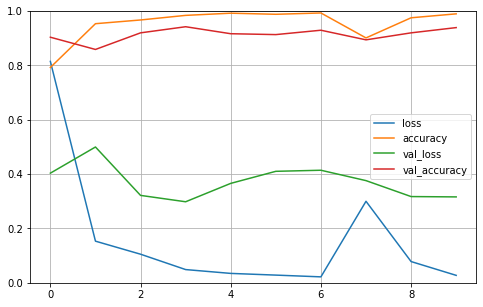

In [30]:
#Ve do thi
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

predic: [5]
predic label: 50 ngàn


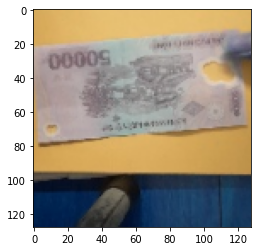

In [34]:
i = 17
sample = np.array([x_test[i]])
plt.imshow(x_test[i])
predictions = np.argmax(model.predict(sample), axis=-1)
print("predic:", predictions)
print("predic label:", x_label[int(predictions)])